In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [42]:
# 1. CSV 데이터 불러오기
df = pd.read_csv("./sample_data/exchange_data.csv")

In [43]:
# 2. Date 정렬
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

numeric_cols = ['Price', 'Open', 'High', 'Low']

In [44]:
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

In [45]:
# 3. 다음날 종가 예측을 위한 타깃 생성
df['Next_Price'] = df['Price'].shift(-1)
df = df[:-1]

In [46]:
# # 4. Feature / Target 설정
X = df[['Price', 'Open', 'High', 'Low']]
y = df['Next_Price']

In [47]:
# 5. 데이터 분리 (80% train, 20% test)
train_size = int(len(df) * 0.8)

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

test_dates = df.loc[X_test.index, 'Date']

In [48]:
# 6. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# 7. 예측
y_pred = model.predict(X_test)
y_pred_series = pd.Series(y_pred, index=y_test.index)

# 8. 오류 측정

percentage_error = ((y_test - y_pred) / y_test) * 100

mse=mean_squared_error(y_test, y_pred)
rmse = mse**2

mse_pct = mean_squared_error(np.zeros(len(percentage_error)), percentage_error)
rmse_pct = np.sqrt(mse_pct)

print("MSE (%) :", mse_pct)
print("RMSE (%):", rmse_pct)

# 날짜별 에러 및 실제 vs 예측 시각화

# 1) 각 시점별 에러 계산
mse_per_step = (y_test- y_pred) ** 2
rmse_per_step = np.sqrt(mse_per_step)


# 1-1) MSE / RMSE 요약 통계 출력 - 포스터 기재용 (평가 지표)
print("\n===== MSE / RMSE Summary (Multiple Linear Regression) =====")

print("▶ MSE")
print(f"  Min  MSE : {mse_per_step.min():.4f}")
print(f"  Max  MSE : {mse_per_step.max():.4f}")
print(f"  Mid  MSE : {np.median(mse_per_step):.4f}")
print(f"  Mean MSE : {mse_per_step.mean():.4f}")

print("\n▶ RMSE")
print(f"  Min  RMSE : {rmse_per_step.min():.4f}")
print(f"  Max  RMSE : {rmse_per_step.max():.4f}")
print(f"  Mid  RMSE : {np.median(rmse_per_step):.4f}")
print(f"  Mean RMSE : {rmse_per_step.mean():.4f}")


MSE (%) : 0.2941744433938296
RMSE (%): 0.5423785056524913

===== MSE / RMSE Summary (Multiple Linear Regression) =====
▶ MSE
  Min  MSE : 0.0047
  Max  MSE : 1479.1711
  Mid  MSE : 20.8713
  Mean MSE : 56.6790

▶ RMSE
  Min  RMSE : 0.0685
  Max  RMSE : 38.4600
  Mid  RMSE : 4.5685
  Mean RMSE : 5.6335


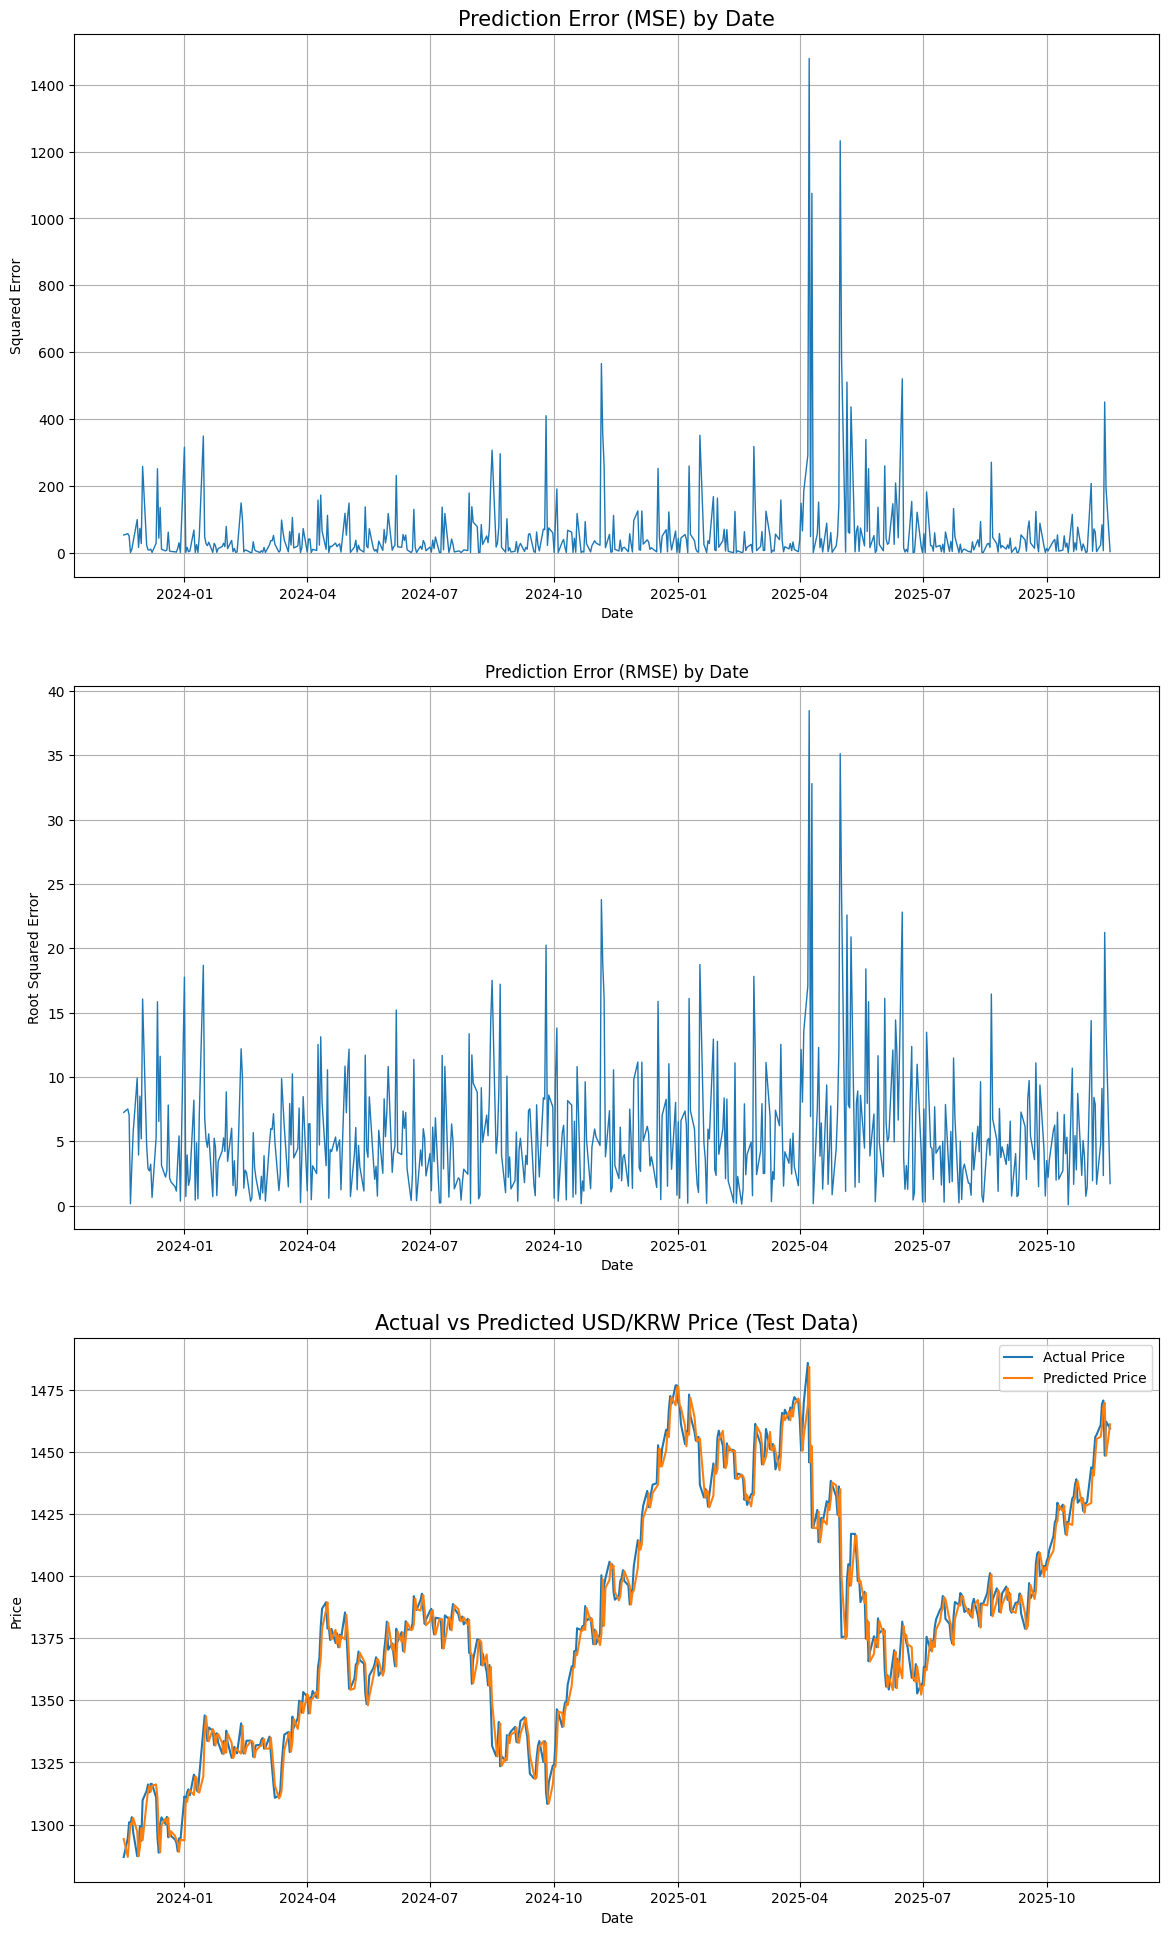

In [50]:
# --- (A) MSE 그래프 ---
plt.figure(figsize=(14, 24))
plt.subplot(3, 1, 1)
plt.plot(test_dates, (y_test - y_pred)**2, linewidth=1)
plt.title("Prediction Error (MSE) by Date", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Squared Error")
plt.grid(True)

# --- (B) RMSE 그래프 ---
plt.subplot(3, 1, 2)
plt.plot(test_dates, np.sqrt((y_test - y_pred)**2), linewidth=1)
plt.title("Prediction Error (RMSE) by Date")
plt.xlabel("Date")
plt.ylabel("Root Squared Error")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(test_dates, y_test, label='Actual Price', linewidth=1.5)
plt.plot(test_dates, y_pred, label='Predicted Price', linewidth=1.5)
plt.title("Actual vs Predicted USD/KRW Price (Test Data)", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.show()